In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount("/GD")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /GD


In [0]:
from fastai.text import * 

In [0]:
import pandas as pd
f_train = open('/GD/My Drive/Colab Notebooks/question_data/train_5500-UTF8.label', 'r+')
f_test = open('/GD/My Drive/Colab Notebooks/question_data/TREC_10-UTF8.label', 'r+')
train = pd.DataFrame(f_train.readlines(), columns = ['Question'])
test = pd.DataFrame(f_test.readlines(), columns = ['Question'])
train['QType'] = train.Question.apply(lambda x: x.split(' ', 1)[0])
train['Question'] = train.Question.apply(lambda x: x.split(' ', 1)[1][:-1])
train['QType-Coarse'] = train.QType.apply(lambda x: x.split(':')[0])
train['QType-Fine'] = train.QType.apply(lambda x: x.split(':')[1])
test['QType'] = test.Question.apply(lambda x: x.split(' ', 1)[0])
test['Question'] = test.Question.apply(lambda x: x.split(' ', 1)[1][:-1])
test['QType-Coarse'] = test.QType.apply(lambda x: x.split(':')[0])
test['QType-Fine'] = test.QType.apply(lambda x: x.split(':')[1])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(pd.Series(train.QType.tolist() + test.QType.tolist()).values)
train['QType'] = le.transform(train.QType.values)
test['QType'] = le.transform(test.QType.values)
le3 = LabelEncoder()
le3.fit(pd.Series(train['QType-Fine'].tolist() + test['QType-Fine'].tolist()).values)
train['QType-Fine'] = le3.transform(train['QType-Fine'].values)
test['QType-Fine'] = le3.transform(test['QType-Fine'].values)



In [5]:
train.head()

,Question,QType,QType-Coarse,QType-Fine
0,How did serfdom develop in and then leave Russ...,4,DESC,23
1,What films featured the character Popeye Doyle ?,9,ENTY,8
2,How can I find a list of celebrities ' real na...,4,DESC,23
3,What fowl grabs the spotlight after the Chines...,6,ENTY,1
4,What is the full form of .com ?,1,ABBR,16


In [6]:
test.head()

,Question,QType,QType-Coarse,QType-Fine
0,How far is it from Denver to Aspen ?,40,NUM,14
1,"What county is Modesto , California in ?",32,LOC,3
2,Who was Galileo ?,28,HUM,12
3,What is an atom ?,2,DESC,11
4,When did Hawaii become a state ?,39,NUM,10


In [0]:
path=Path('/GD/My Drive/Colab Notebooks/fastai')

In [25]:
data_lm = TextLMDataBunch.from_df(path=path,
 train_df=train,
 valid_df=test, 
 label_cols='QType', 
 text_cols='Question')

In [26]:
data_clas=TextClasDataBunch.from_df(path=path,train_df=train, 
                                    valid_df=test, 
                                    vocab=data_lm.train_ds.vocab, 
                                    label_cols='QType', 
                                    text_cols='Question')

In [0]:
lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02
Min loss divided by 10: 2.09E-02


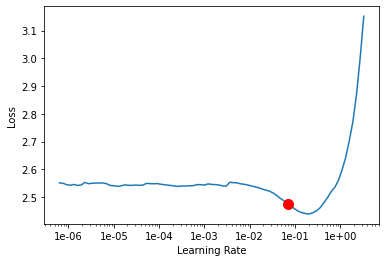

In [32]:
lm.lr_find()
lm.recorder.plot(suggestion=True)

In [34]:
lm.fit_one_cycle(1, 1e-2)
#lm.fit_one_cycle(1, 1e-2)
#lm.fit_one_cycle(1, 1e-2)
#lm.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.343189,2.045312,0.595201,00:03


In [35]:
#lm.freeze_to(-2)
#lm.fit_one_cycle(1, slice(5e-3/2., 5e-3))
lm.unfreeze()
lm.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.219869,2.023998,0.595312,00:03
1,2.145507,1.950192,0.605469,00:03
2,2.068625,1.953223,0.609152,00:03
3,1.979493,1.944369,0.606250,00:03
4,1.886306,1.947940,0.604799,00:03
5,1.804482,1.943230,0.599107,00:03
6,1.711164,1.966780,0.600670,00:03
7,1.625972,1.957620,0.602009,00:03
8,1.562759,1.973046,0.604241,00:03
9,1.518262,1.965866,0.605804,00:03


In [39]:
lm.fit_one_cycle(10, slice(5e-3/1000., 5e-3/100))

epoch,train_loss,valid_loss,accuracy,time
0,1.358672,1.977019,0.603013,00:03
1,1.356004,1.980665,0.602679,00:03
2,1.362835,1.979675,0.602455,00:03
3,1.356405,1.976738,0.602455,00:03
4,1.350198,1.980319,0.602567,00:03
5,1.363410,1.978673,0.600670,00:03
6,1.355363,1.978413,0.601786,00:03
7,1.365912,1.986055,0.600670,00:03
8,1.356425,1.978347,0.602344,00:03
9,1.356316,1.988096,0.600781,00:03


In [37]:
lm.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.386158,1.970910,0.603906,00:03


In [0]:
lm.save_encoder(path/'filename.pth')

In [0]:
clas = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.3)

In [42]:
clas.load_encoder(path/'filename.pth')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5452 items)
x: TextList
xxbos xxmaj how did xxunk develop in and then leave xxmaj russia ?,xxbos xxmaj what films featured the character xxmaj popeye xxmaj xxunk ?,xxbos xxmaj how can i find a list of celebrities ' real names ?,xxbos xxmaj what xxunk xxunk the xxunk after the xxmaj chinese xxmaj year of the xxmaj monkey ?,xxbos xxmaj what is the full form of xxunk ?
y: CategoryList
4,9,4,6,1
Path: /GD/My Drive/Colab Notebooks/fastai;

Valid: LabelList (500 items)
x: TextList
xxbos xxmaj how far is it from xxmaj xxunk to xxmaj xxunk ?,xxbos xxmaj what county is xxmaj xxunk , xxmaj california in ?,xxbos xxmaj who was xxmaj xxunk ?,xxbos xxmaj what is an xxunk ?,xxbos xxmaj when did xxmaj hawaii become a state ?
y: CategoryList
40,32,28,2,39
Path: /GD/My Drive/Colab Notebooks/fastai;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(3528, 400, padding_idx=1)
      (encoder_dp

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-02
Min loss divided by 10: 5.25E-02


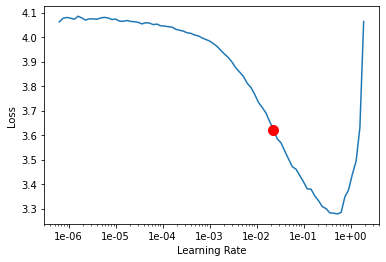

In [43]:
clas.lr_find()
clas.recorder.plot(suggestion=True)

In [44]:
clas.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.992592,1.360803,0.686000,00:04


In [45]:
clas.freeze_to(-2)
#clas.fit_one_cycle(1, slice(5e-3/2., 5e-3))
clas.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.358280,1.042743,0.746000,00:04


In [46]:
clas.freeze_to(-3)
clas.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.901925,0.793180,0.788000,00:04


In [47]:
clas.unfreeze()
clas.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
#clas.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.623469,0.710956,0.818000,00:04
1,0.534608,0.687998,0.816000,00:04


In [48]:
clas.fit_one_cycle(2, slice(1e-4/(2.6**4),1e-4), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.477836,0.685722,0.820000,00:04
1,0.449039,0.673941,0.824000,00:04


In [49]:
clas.fit_one_cycle(2, slice(1e-5/(2.6**4),1e-5), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.450785,0.680009,0.822000,00:04
1,0.444083,0.675511,0.826000,00:04


In [50]:
clas.fit_one_cycle(4, slice(1e-6/(2.6**4),1e-6), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.454856,0.680974,0.826000,00:04
1,0.435626,0.667360,0.828000,00:04
2,0.471078,0.679602,0.822000,00:04
3,0.457596,0.686594,0.820000,00:04


In [51]:
clas.fit_one_cycle(4, slice(1e-7/(2.6**4),1e-7), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.450377,0.679342,0.822000,00:04
1,0.449420,0.682669,0.820000,00:04
2,0.458939,0.673250,0.830000,00:04
3,0.458419,0.696355,0.822000,00:04


In [52]:
clas.unfreeze()
clas.fit_one_cycle(10, 9.12E-07)

epoch,train_loss,valid_loss,accuracy,time
0,0.443620,0.681727,0.820000,00:04
1,0.437086,0.682568,0.822000,00:04
2,0.438981,0.680098,0.826000,00:04
3,0.443421,0.668504,0.826000,00:04
4,0.437519,0.674191,0.828000,00:04
5,0.451084,0.677933,0.826000,00:04
6,0.441360,0.668640,0.828000,00:04
7,0.439701,0.690615,0.822000,00:04
8,0.454408,0.683886,0.820000,00:04
9,0.442044,0.682677,0.824000,00:04


In [53]:
clas.unfreeze()
clas.fit_one_cycle(1, 0.002511886431509582)

epoch,train_loss,valid_loss,accuracy,time
0,0.663351,0.664209,0.842000,00:04


In [54]:
clas.unfreeze()
clas.fit_one_cycle(1, 0.002511886431509582)

epoch,train_loss,valid_loss,accuracy,time
0,0.475552,0.617383,0.854000,00:04


In [55]:
clas.unfreeze()
clas.fit_one_cycle(1, 0.002511886431509582)

epoch,train_loss,valid_loss,accuracy,time
0,0.338008,0.641316,0.862000,00:04


In [56]:
clas.unfreeze()
clas.fit_one_cycle(1, 0.002511886431509582)

epoch,train_loss,valid_loss,accuracy,time
0,0.283920,0.627606,0.868000,00:04


In [57]:
clas.unfreeze()
clas.fit_one_cycle(3, 0.002511886431509582)

epoch,train_loss,valid_loss,accuracy,time
0,0.188007,0.715976,0.834000,00:04
1,0.185409,0.667896,0.876000,00:04
2,0.096819,0.652060,0.874000,00:04


In [0]:
clas.export(path/"clas")